In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, confusion_matrix, roc_auc_score, f1_score

In [161]:
benign = pd.read_csv("../data/benign.csv")
phisher = pd.read_csv("../data/phisher_data.csv")

In [162]:
benign.drop(["link", "letters_nums_in_link", "domain_name"], axis=1, inplace=True)
phisher.drop(["link", "letters_nums_in_link", "domain_name"], axis=1, inplace=True)

In [163]:
benign

,count_subdomain,ip_in_domain,dog_symbol,url_length,url_depth,redirection,http_https_domain,https_in_scheme,url_shortening,dash_in_domain,...,no_hyperlink,internal_hyperlink_ratio,external_hyperlink_ratio,external_css,susp_form_link_action,anchor_null_links_answer,exist_of_extern_favicon,freq_of_most_anchor,footer_value,sfh
0,0.0,False,False,1.0,3,False,False,False,False,False,...,False,0,0,True,False,False,False,0.021053,0.058824,0
1,0.0,False,False,0.5,1,False,False,False,True,False,...,False,0,0,True,False,False,True,0.500000,0.000000,0
2,0.0,False,False,1.0,2,False,False,False,True,False,...,False,0,0,True,False,False,True,0.022346,0.083333,0
3,0.0,False,False,0.5,2,False,False,False,True,False,...,False,0,0,True,False,False,True,0.008368,0.010204,0
4,0.0,False,False,0.5,5,False,False,False,True,False,...,False,0,0,True,True,False,False,0.036585,0.058824,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,0.0,False,False,0.5,6,False,False,False,True,False,...,False,0,0,True,False,False,False,0.034091,0.000000,0
2588,0.0,False,False,1.0,8,True,True,False,True,False,...,False,0,0,True,False,False,True,0.014706,0.016129,0
2589,0.0,False,False,1.0,5,False,False,True,False,False,...,False,0,0,True,False,False,False,0.020833,0.066667,0
2590,0.0,False,False,1.0,4,False,False,False,True,False,...,False,0,0,True,False,False,False,0.007246,0.500000,0


In [164]:
phisher

,count_subdomain,ip_in_domain,dog_symbol,url_length,url_depth,redirection,http_https_domain,https_in_scheme,url_shortening,dash_in_domain,...,no_hyperlink,internal_hyperlink_ratio,external_hyperlink_ratio,external_css,susp_form_link_action,anchor_null_links_answer,exist_of_extern_favicon,freq_of_most_anchor,footer_value,sfh
0,0.0,False,False,0,0,False,False,True,False,False,...,False,1,1,False,True,False,True,0.058824,0.000000,0.0
1,0.0,False,False,0,0,False,False,True,False,False,...,False,0,0,True,False,False,False,0.076923,0.333333,0.0
2,0.0,False,False,0,1,False,False,True,False,True,...,False,0,0,True,False,False,False,0.202703,1.000000,1.0
3,0.0,False,False,0,1,False,False,True,False,False,...,False,0,0,True,False,False,False,0.500000,0.000000,0.0
4,0.0,False,False,0,0,False,False,False,False,False,...,False,1,0,True,False,False,False,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0.0,False,False,0,1,False,False,True,False,False,...,False,0,0,True,False,False,False,0.012959,0.250000,0.0
2998,0.0,False,False,0,1,False,False,True,True,False,...,False,1,1,True,False,False,True,0.019231,0.000000,1.0
2999,0.0,False,False,0,1,False,False,True,False,False,...,False,1,1,True,True,False,True,0.021739,0.031250,0.5
3000,0.0,False,False,0,1,False,False,True,True,False,...,False,0,0,True,False,False,False,0.027778,0.000000,0.0


# prepare data

In [165]:
phisher["phisher"] = 1
benign["phisher"] = 0

In [166]:
data = pd.concat([benign, phisher])

data

,count_subdomain,ip_in_domain,dog_symbol,url_length,url_depth,redirection,http_https_domain,https_in_scheme,url_shortening,dash_in_domain,...,internal_hyperlink_ratio,external_hyperlink_ratio,external_css,susp_form_link_action,anchor_null_links_answer,exist_of_extern_favicon,freq_of_most_anchor,footer_value,sfh,phisher
0,0.0,False,False,1.0,3,False,False,False,False,False,...,0,0,True,False,False,False,0.021053,0.058824,0.0,0
1,0.0,False,False,0.5,1,False,False,False,True,False,...,0,0,True,False,False,True,0.500000,0.000000,0.0,0
2,0.0,False,False,1.0,2,False,False,False,True,False,...,0,0,True,False,False,True,0.022346,0.083333,0.0,0
3,0.0,False,False,0.5,2,False,False,False,True,False,...,0,0,True,False,False,True,0.008368,0.010204,0.0,0
4,0.0,False,False,0.5,5,False,False,False,True,False,...,0,0,True,True,False,False,0.036585,0.058824,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0.0,False,False,0.0,1,False,False,True,False,False,...,0,0,True,False,False,False,0.012959,0.250000,0.0,1
2998,0.0,False,False,0.0,1,False,False,True,True,False,...,1,1,True,False,False,True,0.019231,0.000000,1.0,1
2999,0.0,False,False,0.0,1,False,False,True,False,False,...,1,1,True,True,False,True,0.021739,0.031250,0.5,1
3000,0.0,False,False,0.0,1,False,False,True,True,False,...,0,0,True,False,False,False,0.027778,0.000000,0.0,1


In [167]:
data.corr()["phisher"].sort_values()

url_length                 -0.912598
url_shortening             -0.714379
url_depth                  -0.518040
upper_case                 -0.351642
external_css               -0.323235
exist_of_extern_favicon    -0.322542
http_https_domain          -0.071078
redirection                -0.059171
brand_names                -0.028619
footer_value                0.010586
dog_symbol                  0.044846
sensetive_words             0.046792
ip_in_domain                0.055660
susp_form_link_action       0.065572
count_subdomain             0.173973
num_of_dots                 0.176471
anchor_null_links_answer    0.220757
external_hyperlink_ratio    0.277476
no_hyperlink                0.280439
sfh                         0.286303
freq_of_most_anchor         0.286920
dash_in_domain              0.351233
internal_hyperlink_ratio    0.438057
https_in_scheme             0.814159
phisher                     1.000000
Name: phisher, dtype: float64

In [168]:
data = data.drop("url_length", axis=1)

In [169]:
X, y = data.drop("phisher", axis=1).to_numpy(), data["phisher"].to_numpy()

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Test data')

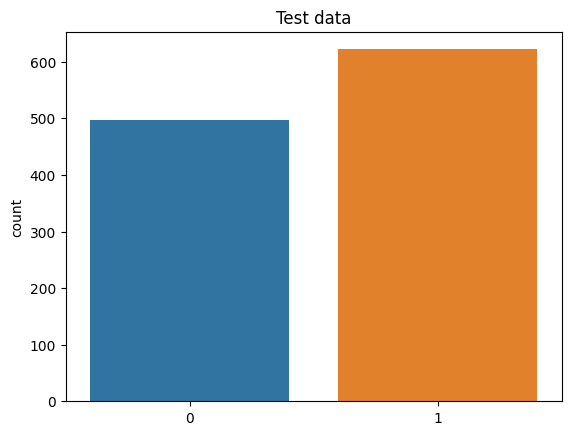

In [171]:
sns.countplot(x=y_test)
plt.title("Test data")

# Test different models

/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

LogisticRegression

accuracy_score --> 0.9776586237712243
recall_score --> 0.9662379421221865
precision_score --> 0.9933884297520661
roc_auc_score --> 0.9790948261918779
f1_score --> 0.9796251018744906
False positive rate --> 0.008048289738430584
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier

accuracy_score --> 0.9874888293118856
recall_score --> 0.9807073954983923
precision_score --> 0.9967320261437909
roc_auc_score --> 0.9883416253145885
f1_score --> 0.9886547811993517
False positive rate --> 0.004024144869215292
----------------------------------------------------------------------------------------------------
SVC

accuracy_score --> 0.9848078641644326
recall_score --> 0.9790996784565916
precision_score --> 0.9934747145187602
roc_auc_score --> 0.9855256943590803
f1_score --> 0.9862348178137652
False positive rate --> 0.008048289738430584
--------------------------------------------------------------------

/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

RandomForestClassifier

accuracy_score --> 0.9928507596067918
recall_score --> 0.9871382636655949
precision_score --> 1.0
roc_auc_score --> 0.9935691318327975
f1_score --> 0.9935275080906149
False positive rate --> 0.0
----------------------------------------------------------------------------------------------------
XGBClassifier

accuracy_score --> 0.9937444146559428
recall_score --> 0.9887459807073955
precision_score --> 1.0
roc_auc_score --> 0.9943729903536977
f1_score --> 0.994341147938561
False positive rate --> 0.0
----------------------------------------------------------------------------------------------------


/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/danylo/.local/lib/python3.10/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

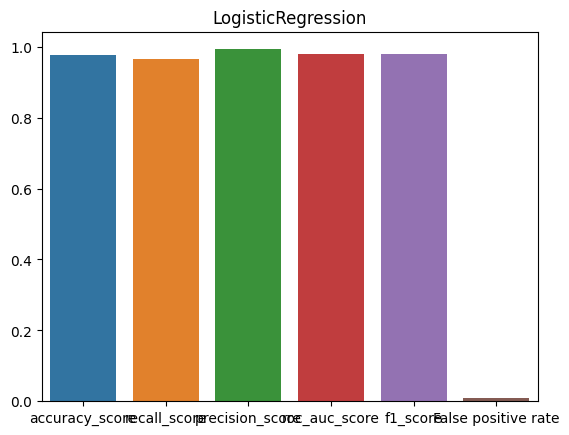

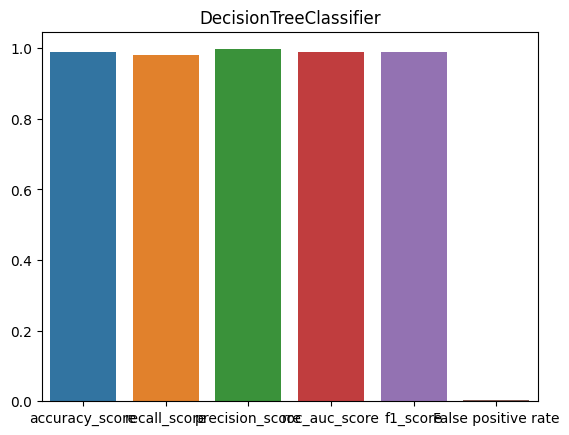

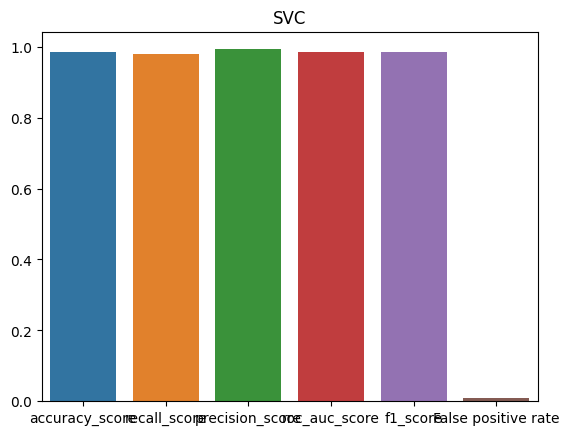

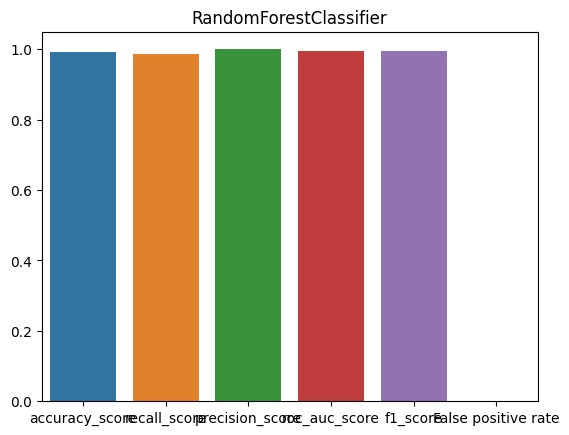

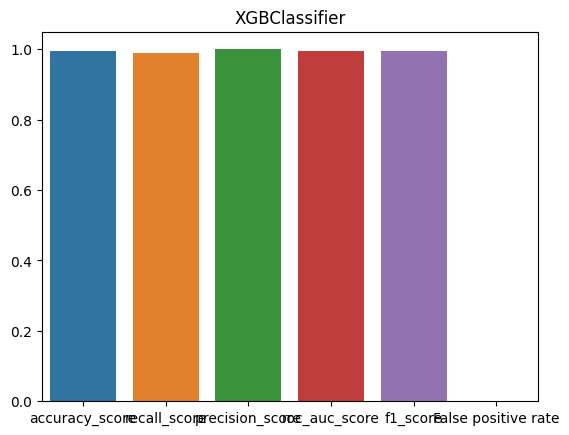

In [172]:
models = [LogisticRegression(solver='lbfgs', C=1.0, max_iter=100, penalty='l2'),
          DecisionTreeClassifier(criterion='gini', max_depth=5),
          SVC(kernel='linear', C=10, random_state=12),
          RandomForestClassifier(n_estimators=10, random_state=42),
          XGBClassifier(learning_rate=0.4, max_depth=5)]


roc = []
for model in models:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    TN = sum((y_test == 0) & (y_test_pred == 0))
    FP = sum((y_test == 0) & (y_test_pred == 1))
    TP = sum((y_test == 1) & (y_test_pred == 1))
    FN = sum((y_test == 1) & (y_test_pred == 0))
    
    FPR = FP/(TN+FP)
    TPR = TP/(TP+FN)
    
    scores = [f"{metric.__name__} --> {metric(y_test, y_test_pred)}" \
                     for metric in [accuracy_score, recall_score, precision_score, roc_auc_score, f1_score]]
    
    print(model.__class__.__name__)
    print()
    print('\n'.join(scores))
    print("False positive rate -->", FPR)
    print('-'*100)
    
    scores = [score.split(' --> ') for score in scores]
    X_plot, y_plot = [score[0] for score in scores]+["False positive rate"], [float(score[1]) for score in scores]+[FPR]
    
    fig, ax = plt.subplots()
    sns.barplot(x=X_plot, y=y_plot)
    plt.title(model.__class__.__name__)
    
    
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    
#     roc.append([model.__class__.__name__, fpr, tpr, roc_auc])
    roc.append([model.__class__.__name__, roc_auc])

    
# plt.figure(figsize=(20,10))
# for i in roc:
#     plt.plot([j for j in i[1]], [j for j in i[2]], color='darkorange', lw=2, label=f'ROC curve (area = {i[3]:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.legend(loc='lower right')
    
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
# plt.legend([i[0] for i in roc])

# different features

In [173]:
X_url = data[data.columns[:13]]
X_hyperlink = data[data.columns[13:]]

In [174]:
X_url_train, X_url_test, y_url_train, y_url_test = train_test_split(X_url, y)
X_hyperlink_train, X_hyperlink_test, y_hyperlink_train, y_hyperlink_test = train_test_split(X_hyperlink, y)

In [175]:
model_url = XGBClassifier(learning_rate=0.4, max_depth=5)
model_hyperlink = XGBClassifier(learning_rate=0.4, max_depth=5)

In [176]:
model_url.fit(X_url_train, y_url_train)
model_hyperlink.fit(X_hyperlink_train, y_hyperlink_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9792709077912795
1.0


<BarContainer object of 2 artists>

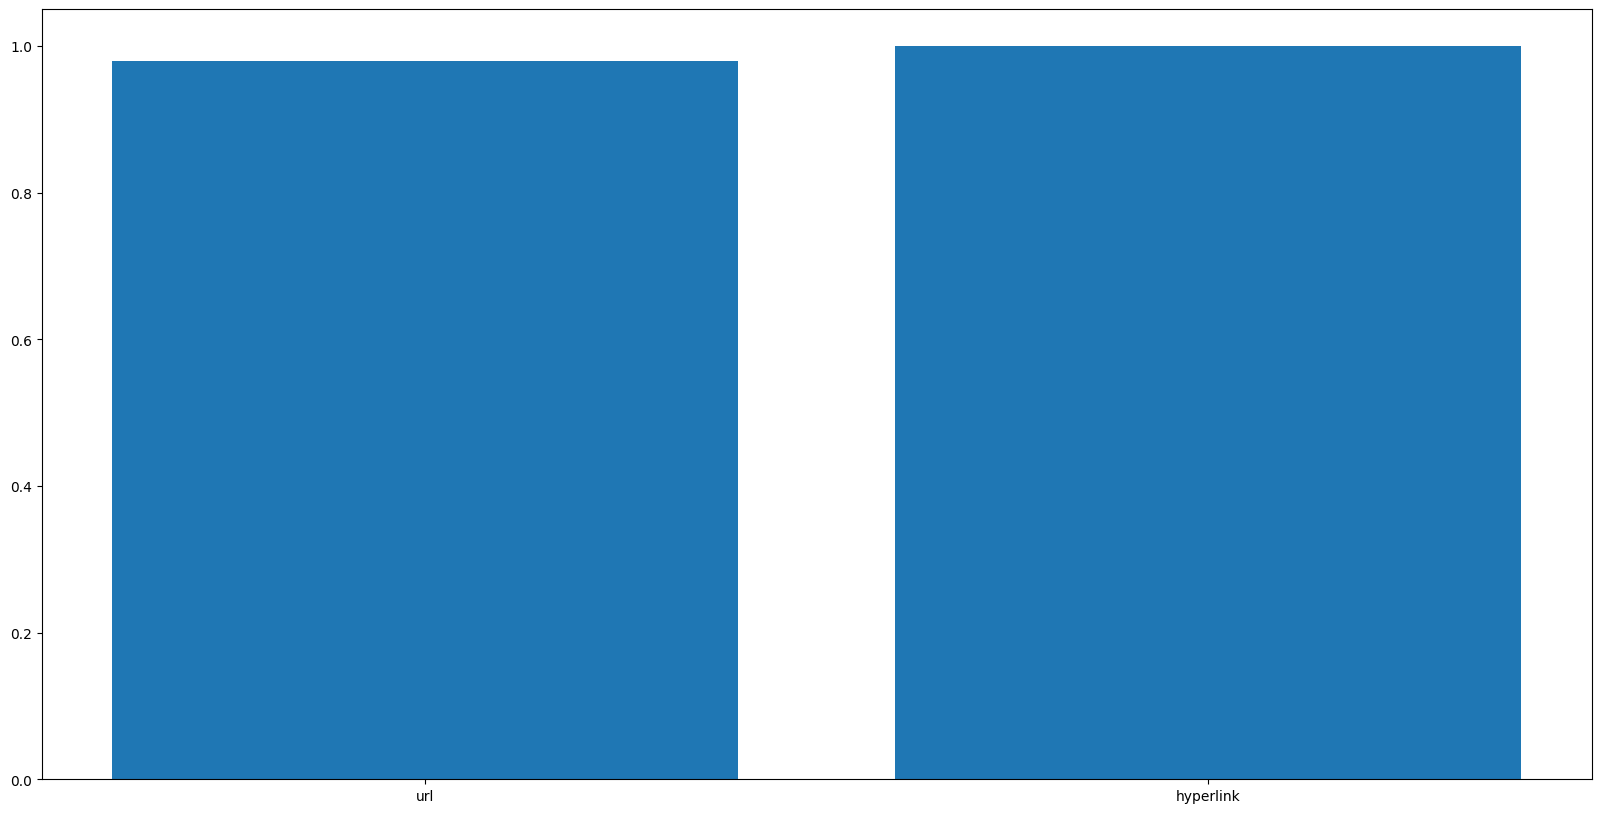

In [177]:
fig = plt.figure(figsize=(20,10))

print(model_url.score(X_url_test, y_url_test))
print(model_hyperlink.score(X_hyperlink_test, y_hyperlink_test))

plt.bar(x=["url", "hyperlink"], height=[model_url.score(X_url_test, y_url_test), model_hyperlink.score(X_hyperlink_test, y_hyperlink_test)])